In [39]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential, Input, Model
from keras.layers import Dense, SimpleRNN, Embedding, GRU, LSTM, Concatenate,Conv1D,MaxPool1D,Dropout,Flatten,BatchNormalization
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
neg_1 = pd.read_csv('new_nev.csv')
pos_1 = pd.read_csv('new_pos.csv')
neg_1['index'] = 0
pos_1['index'] = 1
max_features = 1000
text_neg_1 = neg_1[['text','index']]
text_pos_1 = pos_1[['text','index']]

,Unnamed: 0,level_0,text,index
0,0,0,한국 반도체 업계에 미칠 파장이 만만치 않을 것 같다일 월스트리트저널에서 미국 반도...,1
1,1,1,사진제공일진하이솔루스수소차 솔루션 전문 기업인 일진하이솔루스가 공모주 청약에서 증거...,1
2,2,2,삼성생명삼성생명은 고객 편의를 높이기 위해 다양한 디지털 서비스를 연이어 선보이고 ...,1
3,3,3,흥행 척도 첫날 개통 대수서 종전 갤노트 약 만대 넘어일주일간 사전 예약 대수 만대...,1
4,4,4,한화솔루션이 삼성전기의 와이파이 통신 모듈 사업 인수 검토에 들어갔다 업계에선 한화...,1
...,...,...,...,...
436,436,69,내달부터 본격 부스터샷 백신 양극화 갈수록 심화 화이자와 억회분 공급 계약 은 조...,0
437,437,70,아프가니스탄에서 하늘은 두려움의 근원입니다 폭격으로 존재가 소멸되는 제가 재무장관이...,0
438,438,71,전날보다 대로 밀려테이퍼링 신호증시하락 영향원달러 환율도 한때 연중 최고치외국인 ...,0
439,439,72,조선의 위기 대응 노트김준태 지음쪽만원민음사동아일보천재지변이 일어나고 일어나지 않고...,0


In [3]:
data = pd.concat([text_pos_1,text_neg_1])

data = data.reset_index()

In [4]:
data

,level_0,text,index
0,0,탁구 신동 신유빈이 어린이 환자를 위해 만 원을 기부했다 도쿄 올림픽에서 인기를 ...,1
1,1,해변에서 서핑을 즐기던 대 미국 남성이 강풍에 날아가 건물에 부딪혀 숨졌다뉴욕포스트...,1
2,2,국민의힘 대선 주자 유승민 전 의원이 아프가니스탄 현지에서 우리 정부와 함께 일했던...,1
3,3,미국프로농구 로스앤젤레스 레이커스에 코비 브라이언트샤킬 오닐 콤비가 있었다면 한국 ...,1
4,4,하루하루 바삐 사는 우리들 은퇴를 대비하기가 쉽지 않습니다 하지만 은퇴는 언제든 닥...,1
...,...,...,...
1064,438,년 만에 상봉한 타오왼쪽와 그의 어머니 저우 바이두 갈무리중국에서 인신매매범에게 납...,0
1065,439,미국 보이스카우트가 수십 년 간 아동 단원들에게 성적 학대를 저지른 문제로 약 조 ...,0
1066,440,조 바이든 미국 대통령이 부인 질 여사와 함께 일현지시간 미 플로리다 서프사이드의 ...,0
1067,441,미국 국무부가 북한을 년 연속 최악의 인신매매 국가로 지정했다 뉴스미국이 북한을 ...,0


In [3]:
data = pd.read_csv('../data/final_data.csv')
tokenizer = Tokenizer(num_words=2000, oov_token = 'OOV')
tokenizer.fit_on_texts(data['text'])
token_data = tokenizer.texts_to_sequences(data['text'])
token_data = pad_sequences(token_data, padding='post') 

array([[   1,    1,    1, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [1068,  654,    1, ...,    0,    0,    0],
       ...,
       [1902,  123,   33, ...,    0,    0,    0],
       [  47,    1,    1, ...,    0,    0,    0],
       [  16,    1,    6, ...,    0,    0,    0]])

In [2]:
data = pd.read_csv('../data/final_data.csv')
# Tokenizing 해주기
tokenizer = Tokenizer()
# 문자 데이터 -> 리스트 형태로 변경
tokenizer.fit_on_texts(data['text'])
# tokenizer을 key : value, 즉 dict로 만들어줌
print(tokenizer.word_index) 
# 빈도수가 너무 적은 단어는 제거해주기
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq += value
    # 길이가 작으면 rare하다
    if value < threshold:
        rare_cnt +=1
        rare_freq += value
print('전체 단어수 : ', words_cnt)    
print(f"빈도수가 {threshold-1} 이 하인 희귀 단어 수 {rare_cnt}")
print(f'희귀 단어 비율 : {(rare_cnt/words_cnt) * 100}')
print(f"희귀 단어 등장 빈도 비율 : {(rare_freq/words_freq) * 100}")

vocab_size = words_cnt - rare_cnt +2
# print(vocab_size)

{'수': 1, '있다': 2, '등': 3, '년': 4, '일': 5, '있는': 6, '월': 7, '이': 8, '미국': 9, '것으로': 10, '기자': 11, '한': 12, '만': 13, '전': 14, '코로나': 15, '통해': 16, '위해': 17, '및': 18, '더': 19, '대한': 20, '그': 21, '혁명': 22, '지지율의': 23, '혁명과': 24, '억': 25, '국내': 26, '지난해': 27, '중': 28, '같은': 29, '글로벌': 30, '원': 31, '개': 32, '반도체': 33, '를': 34, '있다고': 35, '했다': 36, '위한': 37, '가장': 38, '는': 39, '따르면': 40, '올해': 41, '씨': 42, '최근': 43, '등을': 44, '함께': 45, '한국': 46, '이후': 47, '기자페이지': 48, '세계': 49, '조': 50, '것이라고': 51, '백신': 52, '할': 53, '대': 54, '하는': 55, '이날': 56, '의': 57, '다양한': 58, '다른': 59, '큰': 60, '협상': 61, '가': 62, '타결': 63, '때': 64, '것은': 65, '의료대란': 66, '최대': 67, '정부': 68, '것이': 69, '삼성전자': 70, '이번': 71, '두': 72, '많은': 73, '합의': 74, '약': 75, '모두': 76, '때문에': 77, '서울': 78, '한다': 79, '밝혔다': 80, '극적': 81, '있다는': 82, '한밤': 83, '피했다정부측': 84, '보건노조와': 85, '대쟁점': 86, '재원일정': 87, '로': 88, '대해': 89, '이상': 90, '그는': 91, '중국': 92, '에': 93, '따라': 94, '것이다': 95, '기업': 96, '뒤': 97, '올림픽': 98, '하지만': 99, '아니라': 100, '

In [3]:
# oov == out of vocabulary
tokenizer = Tokenizer(vocab_size , oov_token = 'OOV')
tokenizer.fit_on_texts(data['text'])
# sentence를 index값 즉 시퀀스로 만들어줌
x = tokenizer.texts_to_sequences(data['text'])
y =np.array(data['index'])

In [4]:
# 전처리하면서 길이가 0이된 문장 삭제
drop_ = [idx for idx, sentence in enumerate(x) if len(sentence) < 1]
x = np.delete(x , drop_ ,axis=0)
y = np.delete(y , drop_ ,axis=0)

최대 길이 :   2089
평균 길이 :   372.6127333652465


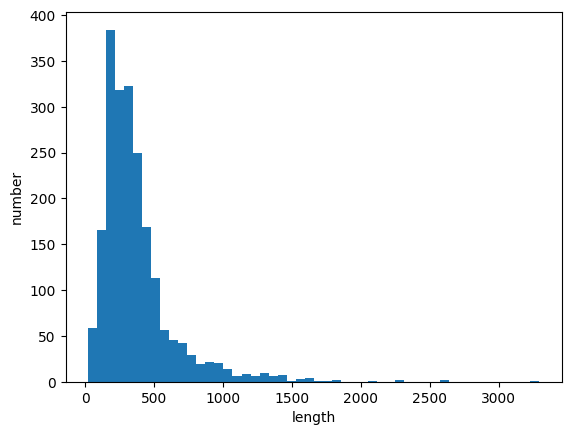

In [5]:
#padding 길이를 맞추고, 입력을 동일한 길이로 맞춰줌
print('최대 길이 :  ', max(len(x) for l in x))
print('평균 길이 :  ', sum(map(len, x))/len(x))

# 플롯팅하여 최대길이 지정해주기
plt.hist([len(s) for s in  x],bins = 50)
plt.xlabel('length')
plt.ylabel('number')
plt.show()



In [6]:
max_len = 600
x= pad_sequences(x,maxlen=max_len) 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 256)) 
model.add(LSTM(512,activation='tanh')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 256)         9813248   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 257       
Total params: 11,519,745
Trainable params: 11,519,745
Non-trainable params: 0
_________________________________________________________________


In [31]:
X_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [48]:
model = Sequential([
    Embedding(vocab_size, 256,input_length=max_len),
    Conv1D(256, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(256, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(256, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(256, 3, padding='valid', activation='relu'),Dropout(0.4),
    MaxPool1D(),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    MaxPool1D(),
    BatchNormalization(),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    Conv1D(512, 3, padding='valid', activation='relu'),Dropout(0.4),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu',kernel_initializer='he_uniform'),
    Dropout(.5),
    Dense(128, activation='relu',kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 600, 256)          9813248   
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 598, 256)          196864    
_________________________________________________________________
dropout_31 (Dropout)         (None, 598, 256)          0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 596, 256)          196864    
_________________________________________________________________
dropout_32 (Dropout)         (None, 596, 256)          0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 594, 256)          196864    
_________________________________________________________________
dropout_33 (Dropout)         (None, 594, 256)        

In [50]:
model.compile(
    loss = "binary_crossentropy",
    optimizer = keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics = ['accuracy']
)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50)

with tf.device('/device:GPU:0'):
    history = model.fit(
        x = X_train,
        y = y_train,
        callbacks=[es],
        epochs= 1000,
        batch_size= 512,
        validation_split= .3
    )
results = model.evaluate(X_test, y_test, batch_size=512)
model.save('ko_newsData.h5')

Epoch 1/1000


KeyboardInterrupt: 

In [ ]:
#훈련결과 확인
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['accuracy']
val_acc = hist_dict['val_accuracy']

plt.plot(loss, 'b--', label = 'train loss')
plt.plot(val_loss, 'r:' , label = 'val loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label = 'train acc')
plt.plot(val_acc, 'r:' , label = 'val acc')
plt.legend()
plt.grid()

plt.show()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9458433513304775688,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9579578574108285929
 physical_device_desc: "device: XLA_CPU device"]

In [103]:
loss_and_metrics = merged_model.evaluate(X_test, y_test, batch_size=32)

3/3 [==============================] - 4s 1s/step - loss: 0.6098 - accuracy: 0.7101


In [123]:
merged_model.save('model_2.h5')

In [125]:
from keras.models import load_model
model = load_model('model_2.h5')

In [131]:
data_1 = pd.read_csv('afganistan_news.csv')

In [132]:
data_1['news_content']

0      트위터 캡처\n\n\n아프가니스탄에서의 자살폭탄 테러로 미군 13명을 포함해 최소 ...
1      충북 진천군의 온라인 쇼핑몰 ‘진천몰’이 29일 운영을 일시 중단했다.\n\n아프가...
2      프랑스와 영국이 30일 유엔 안전보장이사회 화상 회의에서 아프가니스탄 수도 카불에 ...
3      일본이 수니파 무장단체 탈레반이 점령한 아프가니스탄 수도 카불에 자위대 수송기를 파...
4      26일 아프가니스탄 카불 공항 폭탄 테러로 숨진 미군들의 안타까운 사연들이 알려지고...
                             ...                        
238    탈레반에 함락된 아프간 쿤두즈.\n이슬람 무장 반군 탈레반의 아프가니스탄 장악이 예...
239    무장 반군 탈레반이 아프가니스탄 북부 쿤두즈 등 4개 주도(州都)를 점령한 가운데 ...
240    정부군 무력… 교전하자마자 장악\n수도 카불선 정부 언론책임자 희생\n“소행이 괘씸...
241    미군이 대부분 철수한 아프가니스탄에서 무장 반군 탈레반이 님루즈주(州)의 주도(州都...
242    지난달 9일 아프가니스탄의 바그람 미 공군기지에서 일했던 노동자들이 미군 철수 이후...
Name: news_content, Length: 243, dtype: object

In [133]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data_1['news_content'])
token_data = tokenizer.texts_to_sequences(data_1['news_content'])
token_data = pad_sequences(token_data, padding='post')

In [143]:
y_predict = model.predict(token_data[0])

In [144]:
y_predict


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15793245717325333002,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8161565558292662229
 physical_device_desc: "device: XLA_CPU device"]